<a href="https://colab.research.google.com/github/xinconggg/Machine-Learning/blob/main/Intro%20to%20Artificial%20Neural%20Networks%20with%20Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing Multi-Layer Perceptrons (MLPs) with Keras
### Building an Image Classifier using the Sequential API
#### Using Keras to load the dataset
`Keras` will be used to fetch and load common datasets
 including MNIST, Fashion MNIST and a few more. First, load Fashion MNIST, which is already shuffled and split into a training set (first 60,000) and test test (last 10,1000). However, the last 5,000 images from the training set will be used for validation.

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000] # Select all except for the last 5,000 images
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:] # Select last 5,000 images onwards

One key difference between using `Keras` instead of `Scikit-Learn` to load MNIST or Fashion MNIST is that every image is represented as a 28 x 28 array instead of a 1D array of size 784.

The pixel values in the Fashion MNIST dataset are integers between 0 and 255. Neural networks typically perform better when inputs are normalized to a range of
[0,1]. Add normalization as follows:

In [2]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

For Fashion MNIST, we need the list of class names to know what we are dealing with:

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#### Creating the model using Sequential API
Create a Classification MLP with 2 hidden layers:

In [4]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]), # Builds the Input and Flatten layer, Keras needs to know the shape of the inputs to determine the shape of the connection weight matrix of the 1st hidden layer then Flatten layer which converts each input image into a 1D array
    tf.keras.layers.Dense(300, activation="relu"), # 1st Hidden layer (a Dense layer) with 300 neurons, by using the ReLU activation function
    tf.keras.layers.Dense(100, activation="relu"), # 2nd Hidden layer (a Dense layer) with 100 neurons, also by using the ReLU activation function
    tf.keras.layers.Dense(10, activation="softmax") # Output layer (a Dense layer) with 10 neurons, using the softmax activation function because the classes are exclusive
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The model's `summary` method displays all the model's layers, including each layer's name, output shape and its number of parameters:

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

All the parameters of a layer can be accessed using `get_weights` and `set_weights` methods:

In [6]:
hidden1 = model.layers[1] # assign the 1st hidden layer to a variable

weights, biases = hidden1.get_weights()
weights

array([[ 0.02803791,  0.06402741,  0.0630151 , ...,  0.01718603,
         0.0163573 ,  0.0671701 ],
       [ 0.06509364,  0.03904448, -0.045802  , ...,  0.00118237,
        -0.06851136, -0.07175089],
       [-0.05061892,  0.00069909,  0.07330933, ..., -0.01160989,
        -0.06706563,  0.00405324],
       ...,
       [ 0.06233954,  0.05894341, -0.00969139, ...,  0.07268679,
        -0.03873   , -0.02290129],
       [ 0.04116823,  0.06339572,  0.06248954, ..., -0.00746386,
        -0.04758076, -0.03506579],
       [-0.01664733, -0.06560239,  0.046019  , ...,  0.01084657,
        -0.00474168, -0.0127883 ]], dtype=float32)

#### Compiling the model
After a model has been created, its `compile` method can be called to specify the loss function and the optimizer to use:

In [7]:
model.compile(loss="sparse_categorical_crossentropy",  # Sparse Categorical Crossentropy is used for Multi-class Classification problems
              optimizer="sgd", # Stochastic Gradient Descent is a basic optimization that updates weights using the gradient of the loss function with respect to the weights
              metrics=["accuracy"]) # Computes the fraction of correctly classified samples

#### Training and Evaluating the model
To train the model, call its `fit` method:

In [8]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6781 - loss: 1.0244 - val_accuracy: 0.8258 - val_loss: 0.5098
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8260 - loss: 0.5070 - val_accuracy: 0.8410 - val_loss: 0.4570
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8436 - loss: 0.4541 - val_accuracy: 0.8484 - val_loss: 0.4320
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8535 - loss: 0.4239 - val_accuracy: 0.8528 - val_loss: 0.4140
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8594 - loss: 0.4024 - val_accuracy: 0.8542 - val_loss: 0.4021
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8648 - loss: 0.3854 - val_accuracy: 0.8550 - val_loss: 0.3923
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8687 - loss: 0.3714 - val_accuracy: 0.8574 - val_loss: 0.3848
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8718 - loss: 0.3594

If the performance on the training set is much better than on the validation set, the model is probably overfitting the training set or there is a bug such as a data mismatch between the training and validation set.
<br><br>
If the training set is very skewed, with some classes being either over-represented or under-represented, it would be useful to set the `class_weight` arugment when calling the `fit` method, to give a larger weight to under-represented classes and a smaller weight to over-represented classes.

#### Using the model to make predictions
The model's `predict` method can be used to make predictions on new instances. However, since we do not have new instances, use the first 3 instances of the test set:

In [9]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.  , 0.02, 0.  , 0.7 ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

For each instance the model estimates one probability per class, from class 0 to class 9. For example, for the 1st image, the model estimates that the probability of it belonging to class 9 (ankle boot) is 74%, class 5 (Pullover) is 25% and class 7 (Trouser) is 1%.

If only the class with the highest esimated probability is needed, the `argmax` method can be called to get the highest probability class index for each instance:

In [10]:
import numpy as np

y_pred = y_proba.argmax(axis=-1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Building a Regression MLP using the Sequential API

Use the Sequential API to build, train, evaluate and use a regression MLP, with 3 hidden layers composed of 50 neurons each. Want the output layer to have only a single neuron and not use any activation function. Compared to the previous example, rather than using a `Flatten` layer, the `Normalization` layer would be used as the 1st layer instead.

In [11]:
tf.random.set_seed(42)


norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train) # Model must be fitted using adapt() before fit() can be called due to the "Normliazation" layer
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - RootMeanSquaredError: 3.1297 - loss: 9.9351 - val_RootMeanSquaredError: 2.9017 - val_loss: 8.4201
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - RootMeanSquaredError: 2.8842 - loss: 8.3185 - val_RootMeanSquaredError: 2.8993 - val_loss: 8.4060
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - RootMeanSquaredError: 2.8792 - loss: 8.2901 - val_RootMeanSquaredError: 2.9004 - val_loss: 8.4126
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - RootMeanSquaredError: 2.8773 - loss: 8.2789 - val_RootMeanSquaredError: 2.8988 - val_loss: 8.4030
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - RootMeanSquaredError: 2.8759 - loss: 8.2710 - val_RootMeanSquaredError: 2.8963 - val_loss: 8.3888
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - RootMeanSquaredError: 2.8751 - loss: 8.2662 - val_RootMeanSquaredError: 2.8948 - val_loss: 8.3796
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - RootMeanSquare

### Building Complex Models using the Functional API
One example of a non-sequential neural network is a *Wide & Deep* neural network. This neural network architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). <br>
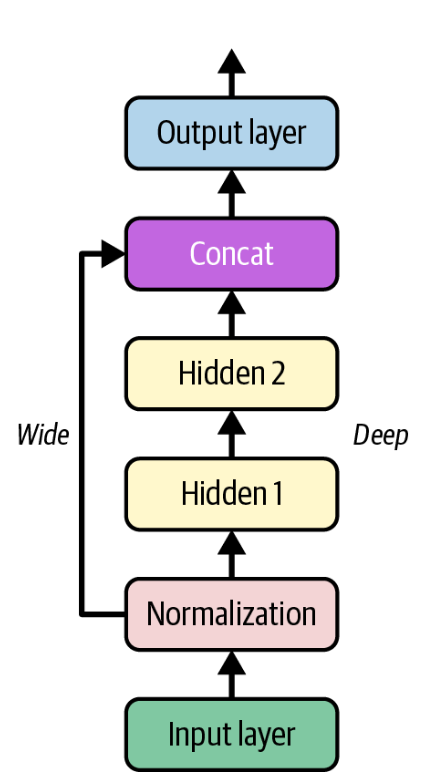

In [12]:
# Reset name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [13]:
normalization_layer = tf.keras.layers.Normalization() # To standardize the inputs
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu") # 30 neurons each, using the ReLU activation function
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu") # 30 neurons each, using the ReLU activation function
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized) # Pass normalized to hidden_layer1
hidden2 = hidden_layer2(hidden1) # Pass hidden1 to hidden_layer2
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - RootMeanSquaredError: 3.2273 - loss: 10.5892 - val_RootMeanSquaredError: 2.9129 - val_loss: 8.4851
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - RootMeanSquaredError: 2.8888 - loss: 8.3454 - val_RootMeanSquaredError: 2.9006 - val_loss: 8.4135
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - RootMeanSquaredError: 2.8797 - loss: 8.2928 - val_RootMeanSquaredError: 2.8965 - val_loss: 8.3899
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - RootMeanSquaredError: 2.8767 - loss: 8.2755 - val_RootMeanSquaredError: 2.8947 - val_loss: 8.3792
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - RootMeanSquaredError: 2.8754 - loss: 8.2679 - val_RootMeanSquaredError: 2.8939 - val_loss: 8.3746
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - RootMeanSquaredError: 2.8747 - loss: 8.2640 - val_RootMeanSquaredError: 2.8935 - val_loss: 8.3724
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - RootMeanSquaredErro

If want to send a subset of the features through the wide path and a different subset through the deep path instead: <br>
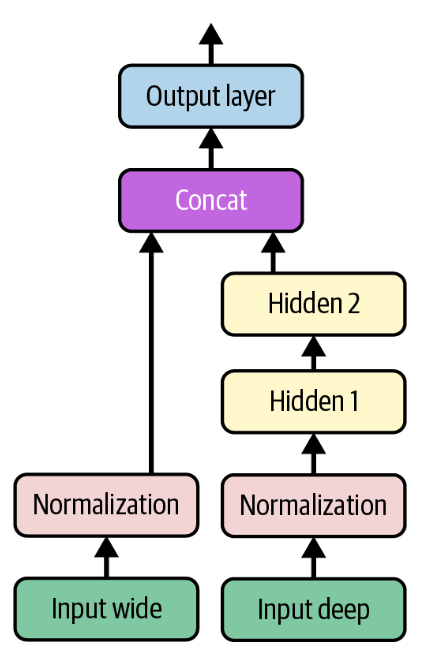

The following code uses multiple inputs. First, to send 5 features through the wide path (features 0 to 4), then 6 features through the deep path (features 2 to 7):

In [15]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# Reshape input data to ensure compatibility (if necessary)
X_train = X_train.reshape(X_train.shape[0], -1)
X_valid = X_valid.reshape(X_valid.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Split data
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:8]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:8]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:8]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 3.4504 - loss: 12.2497 - val_RootMeanSquaredError: 2.7968 - val_loss: 7.8219
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - RootMeanSquaredError: 2.7843 - loss: 7.7526 - val_RootMeanSquaredError: 2.7880 - val_loss: 7.7727
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - RootMeanSquaredError: 2.7715 - loss: 7.6812 - val_RootMeanSquaredError: 2.7810 - val_loss: 7.7341
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - RootMeanSquaredError: 2.7645 - loss: 7.6427 - val_RootMeanSquaredError: 2.7750 - val_loss: 7.7006
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - RootMeanSquaredError: 2.7594 - loss: 7.6142 - val_RootMeanSquaredError: 2.7707 - val_loss: 7.6766
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 2.7564 - loss: 7.5978 - val_RootMeanSquaredError: 2.7676 - val_loss: 7.6599
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredErro

## Fine-Tuning Neural Network Hyperparameters
One way to fine-tune the hyperparameters is to convert the Keras model to a Scikit-Learn estimator and then use `GridSearchCV` or `RandomizedSearchCV` to fine-tune the hyperparametts. <br><br>
However, a better way to fine-tune Keras models is by using the Keras Tuner library.

The following function builds and compiles an MLP to classify Fashion MNIST images using hyperparameters such as the number of hidden layers (n_hidden), the number of neurons per layer (n_neurons), the learning rate (learning_rate) and the type of optimizer to use (optimizer):

In [17]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

To do a basic random search, create a `kt.RandomSearch` tuner, passing the `build_model` function to the constructor and call the tuner's `search` method:

In [18]:
# Flatten and normalize the input data
X_train_full = X_train_full.reshape(-1, 784).astype("float32") / 255.0
X_test = X_test.reshape(-1, 784).astype("float32") / 255.0
X_train = X_train.reshape(-1, 784).astype("float32") / 255.0
X_valid = X_valid.reshape(-1, 784).astype("float32") / 255.0

# Random search tuner
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 50s]
val_accuracy: 0.30559998750686646

Best val_accuracy So Far: 0.8528000116348267
Total elapsed time: 00h 04m 55s


Since `objective` is set to `val_accuracy`, the tuner prefers models with a higher validation accuracy. The best models can be derived using:

In [19]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


The best parameters can be derived using `get_best_hyperparameters`:

In [20]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values # Best hyperparameter

{'n_hidden': 4,
 'n_neurons': 74,
 'learning_rate': 0.00905127409782462,
 'optimizer': 'adam'}

Each tuner is guided by a so-called *Oracle*: before each trial, the tuner asks the oracle to tell it what the next trial should be. The `RandomSearch` tuner uses a `RandomSearchOracle`. Since the oracle keeps track of all the trials, it can display the summary of the best trial using:

In [21]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 2 summary
Hyperparameters:
n_hidden: 4
n_neurons: 74
learning_rate: 0.00905127409782462
optimizer: adam
Score: 0.8528000116348267


The above output shows the best hyperparameters, as well as the validation accuracy.

If satisfied with the best model's performance, continue training it for a few epochs on the full trianing set (X_train_full & y_train_full), then evaluate it on the test set:

In [22]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7331 - loss: 5.6042
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7763 - loss: 0.7138
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7968 - loss: 0.7022
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8234 - loss: 0.5489
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8305 - loss: 0.5434
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8400 - loss: 0.4960
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8486 - loss: 0.4597
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8365 - loss: 0.5254
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8481 - loss: 0.4732
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8011 - loss: 0.7991
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1001 - loss: 7.0100
